# Artificial Intelligence Engineer Nanodegree - Probabilistic Models
## Project: Sign Language Recognition System
- [Introduction](#intro)
- [Part 1 Feature Selection](#part1_tutorial)
    - [Tutorial](#part1_tutorial)
    - [Features Submission](#part1_submission)
    - [Features Unittest](#part1_test)
- [Part 2 Train the models](#part2_tutorial)
    - [Tutorial](#part2_tutorial)
    - [Model Selection Score Submission](#part2_submission)
    - [Model Score Unittest](#part2_test)
- [Part 3 Build a Recognizer](#part3_tutorial)
    - [Tutorial](#part3_tutorial)
    - [Recognizer Submission](#part3_submission)
    - [Recognizer Unittest](#part3_test)
- [Part 4 (OPTIONAL) Improve the WER with Language Models](#part4_info)

<a id='intro'></a>
## Introduction
* **Goal** - build a word recognizer for American Sign Language (ASL) video sequences, demonstrating the power of probabalistic models.  
* **Approach** - [Hidden Markov models (HMM's)](https://en.wikipedia.org/wiki/Hidden_Markov_model) to analyze a series of measurements taken from ASL videos collected for research (see the [RWTH-BOSTON-104 Database](http://www-i6.informatik.rwth-aachen.de/~dreuw/database-rwth-boston-104.php)).  In the video shown, the right-hand x and y locations are plotted as the speaker produces sign language (signs) the sentence.
[![ASLR demo](http://www-i6.informatik.rwth-aachen.de/~dreuw/images/demosample.png)](https://drive.google.com/open?id=0B_5qGuFe-wbhUXRuVnNZVnMtam8)

* **Inputs Pre-defined**: raw data, train, and test sets
* **Part 1**: Derive variety of feature sets. 
* **Part 2**: Implement 3x different model selection criterion to determine the optimal number of hidden states for each word model. 
* **Part 3**: Implement recognizer. Compare effects of the different combinations of feature sets and model selection criteria.  
* **Outputs**: At the end of each Part, complete the submission cells with implementations, answer all questions, pass all unit tests, then submit completed notebook for review.

<a id='part1_tutorial'></a>
## PART 1: Data

### Features Tutorial
##### Load the initial database
* **Inputs** - In **asl_data.py** (module) a **Data Handler** designed for this database is in the `AslDb` class.  It creates the initial [pandas](http://pandas.pydata.org/pandas-docs/stable/) dataframe from data included in the `data` directory as well as dictionaries suitable for extracting data in a format friendly to the [hmmlearn](https://hmmlearn.readthedocs.io/en/latest/) library, which are used to create models in Part 2.

First set up initial database. Select an example set of features for the training set.  At the end of Part 1, you will create additional feature sets for experimentation. 

In [1]:
# # Reload all changed modules every time before executing a new line
# %load_ext autoreload 
# %autoreload 2

import numpy as np
import pandas as pd
from asl_data import AslDb

# Initializes the database
asl = AslDb()

# Display first five rows (pandas data frame) of the ASL database, 
# indexed by video and frame

# print(asl.df.__dict__)
"""
{  'is_copy': None, '_data': 
    BlockManager Items: 
        Index(['left-x', 'left-y', 'right-x', 'right-y', 'nose-x', 'nose-y', 'speaker'], 
          dtype='object')
    Axis 1: MultiIndex(levels=[[1, 2, 3, .., 200, 201], 
                               [0, 1, 2, ..., 160, 161]],
                       labels=[[97, 97, ..., 124, 124], 
                               [0, 1, 2,  56]], 
                       names=['video', 'frame'])
    IntBlock: slice(0, 6, 1), 6 x 15746, dtype: int64
    ObjectBlock: slice(6, 7, 1), 1 x 15746, dtype: object, '_item_cache': {}
}
"""

asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker
video frame                                                           
98    0         149     181      170      175     161      62  woman-1
      1         149     181      170      175     161      62  woman-1
      2         149     181      170      175     161      62  woman-1
      3         149     181      170      175     161      62  woman-1
      4         149     181      170      175     161      62  woman-1

In [2]:
# Display data available for an individual frame
# Reference: `asl_utils.py`

asl.df.ix[98,1]  

left-x         149
left-y         181
right-x        170
right-y        175
nose-x         161
nose-y          62
speaker    woman-1
Name: (98, 1), dtype: object

The frame represented by video 98, frame 1 is shown here:
![Video 98](http://www-i6.informatik.rwth-aachen.de/~dreuw/database/rwth-boston-104/overview/images/orig/098-start.jpg)

##### Frame represented by video 150

In [3]:
# Display data available for an individual frame
# Reference: `asl_utils.py`

asl.df.ix[150,1]  

left-x         155
left-y         182
right-x        169
right-y        141
nose-x         166
nose-y          54
speaker    woman-1
Name: (150, 1), dtype: object

The frame represented by video 150, frame 1 is shown here:
![Video 150](http://www-i6.informatik.rwth-aachen.de/~dreuw/database/rwth-boston-104/overview/images/orig/150-start.jpg)

##### Feature selection for training the model
* About: Feature Selection when training a model
* Objectives: 
    * Choose most relevant variables.
    * Keeping model as simple as possible to reduce training time.  
* Inputs: 
    * Raw features (already provided)
    * Custom derivation of our own. Add columns to pandas dataframe `asl.df` for selection.  

In [4]:
# Calculate the feature named 'grnd-ry' ("ground" right y value), which is 
# the difference b/w right-hand y value and nose y value. 
# Add it to the `asl.df` frames dictionary
# (append result as column label/values to the right of Table) data frame 

asl.df['grnd-ry'] = asl.df['right-y'] - asl.df['nose-y']
asl.df.head()  

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  
video frame           
98    0          113  
      1          113  
      2          113  
      3          113  
      4          113

##### Run

* Click the code snippet cell below and select "Run All"

### Task DONE

* Add df columns for 'grnd-rx', 'grnd-ly', 'grnd-lx' representing differences between hand and nose locations

In [5]:
from asl_utils import test_features_tryit

# DONE 
# Add df columns for 'grnd-rx', 'grnd-ly', 'grnd-lx' representing 
# differences between hand and nose locations
asl.df['grnd-ry'] = asl.df['right-y'] - asl.df['nose-y']
asl.df['grnd-rx'] = asl.df['right-x'] - asl.df['nose-x']
asl.df['grnd-ly'] = asl.df['left-y'] - asl.df['nose-y']
asl.df['grnd-lx'] = asl.df['left-x'] - asl.df['nose-x']

asl.df.head()

# Test the code
# Expected: [9, 113, -12, 119]
# test_features_tryit(asl)

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly  grnd-lx  
video frame                                      
98    0          113        9      119      -12  
      1          113        9      119      -12  
      2          113        9      119      -12  
      3          113        9      119      -12  
      4          113        9      119      -12

In [6]:
# Collect the features into a list
features_ground = ['grnd-rx','grnd-ry','grnd-lx','grnd-ly']

# Show a single set of features for a given (video, frame) tuple
[asl.df.ix[98,1][v] for v in features_ground]

[9, 113, -12, 119]

##### Build the training set

* Collect the feature for all the Words in the training set by passing the defined feature list `features_ground` to the `AslDb.build_training` method of `asl_data.py`. Each WordData object (see `WordsData` class in `asl_data.py` in the training set has multiple examples from various videos suitable for the hmmlearn library. 
* WordData object is dictionary of lists of feature list sequence lists for each word `{'FRANK': [[[87, 225], [87, 225], ...], [[88, 219], [88, 219], ...]]]}`.
* Shown below are unique words that have been loaded into the training set:

In [7]:
training = asl.build_training(features_ground)

print("Training words - num_items: {}".format(training.num_items))
print("Training words - words: {}".format(training.words))


Training words - num_items: 112
Training words - words: ['JOHN', 'WRITE', 'HOMEWORK', 'IX-1P', 'SEE', 'YESTERDAY', 'IX', 'LOVE', 'MARY', 'CAN', 'GO', 'GO1', 'FUTURE', 'GO2', 'PARTY', 'FUTURE1', 'HIT', 'BLAME', 'FRED', 'FISH', 'WONT', 'EAT', 'BUT', 'CHICKEN', 'VEGETABLE', 'CHINA', 'PEOPLE', 'PREFER', 'BROCCOLI', 'LIKE', 'LEAVE', 'SAY', 'BUY', 'HOUSE', 'KNOW', 'CORN', 'CORN1', 'THINK', 'NOT', 'PAST', 'LIVE', 'CHICAGO', 'CAR', 'SHOULD', 'DECIDE', 'VISIT', 'MOVIE', 'WANT', 'SELL', 'TOMORROW', 'NEXT-WEEK', 'NEW-YORK', 'LAST-WEEK', 'WILL', 'FINISH', 'ANN', 'READ', 'BOOK', 'CHOCOLATE', 'FIND', 'SOMETHING-ONE', 'POSS', 'BROTHER', 'ARRIVE', 'HERE', 'GIVE', 'MAN', 'NEW', 'COAT', 'WOMAN', 'GIVE1', 'HAVE', 'FRANK', 'BREAK-DOWN', 'SEARCH-FOR', 'WHO', 'WHAT', 'LEG', 'FRIEND', 'CANDY', 'BLUE', 'SUE', 'BUY1', 'STOLEN', 'OLD', 'STUDENT', 'VIDEOTAPE', 'BORROW', 'MOTHER', 'POTATO', 'TELL', 'BILL', 'THROW', 'APPLE', 'NAME', 'SHOOT', 'SAY-1P', 'SELF', 'GROUP', 'JANA', 'TOY1', 'MANY', 'TOY', 'ALL', 'BOY', '

* Training data object `training` is an instance of class `WordsData` built by calling the `build_training` method of class `AslDb` defined in the `asl_data.py` module. Access data using:
    * `WordsData` instance properties:
        * `words` - get list of keys
    * `WordsData` instance methods:
        * `get_all_sequences` - getter for entire db of words as series of sequences of feature lists for each frame
        * `get_all_Xlengths` - getter for entire db of words as (X, lengths) tuple for use training multiple sequences with the `hmmlearn` library. where X is a numpy array of feature lists and lengths is list of lengths of sequences within X. i.e. `{'FRANK': (array([[ 87, 225],[ 87, 225], ... [ 87, 225,  62, 127], [ 87, 225,  65, 128]]), [14, 18]), }`
        * `get_word_sequences`
        * `get_word_Xlengths`

* The following example outputs two nested lists:
    * First list is a concatenation of all the sequences(the X portion)
    * Second is a list of the sequence lengths(the Lengths portion).

In [8]:
training.get_word_Xlengths('CHOCOLATE')

(array([[-11,  48,   7, 120],
        [-11,  48,   8, 109],
        [ -8,  49,  11,  98],
        [ -7,  50,   7,  87],
        [ -4,  54,   7,  77],
        [ -4,  54,   6,  69],
        [ -4,  54,   6,  69],
        [-13,  52,   6,  69],
        [-13,  52,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [-10,  59,   7,  71],
        [-15,  64,   9,  77],
        [-17,  75,  13,  81],
        [ -4,  48,  -4, 113],
        [ -2,  53,  -4, 113],
        [ -4,  55,   2,  98],
        [ -4,  58,   2,  98],
        [ -1,  59,   2,  89],
        [ -1,  59,  -1,  84],
        [ -1,  59,  -1,  84],
        [ -7,  63,  -1,  84],
        [ -7,  63,  -1,  84],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ 

###### More feature sets
* `asl.df` is still a Simple "feature set", but is enough to started modeling.
* Improve results fom `asl.df` by manipulating the raw values. Below we setup other options for later experimentation. 
    * Option 1: **Grouped Statistics** to normalize each speaker's range of motion using [Pandas stats](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats) functions and [pandas groupby](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). See below example for finding the Means of all speaker subgroups.

In [9]:
df_means = asl.df.groupby('speaker', 0, None, True, True, True, False).mean()
df_means

,left-x,left-y,right-x,right-y,nose-x,nose-y,grnd-ry,grnd-rx,grnd-ly,grnd-lx
speaker,,,,,,,,,,
man-1,206.248203,218.679449,155.464350,150.371031,175.031756,61.642600,88.728430,-19.567406,157.036848,31.216447
woman-1,164.661438,161.271242,151.017865,117.332462,162.655120,57.245098,60.087364,-11.637255,104.026144,2.006318
woman-2,183.214509,176.527232,156.866295,119.835714,170.318973,58.022098,61.813616,-13.452679,118.505134,12.895536


To select a mean that matches by speaker, use the pandas [map](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) method:

In [10]:
# asl.df['left-x-mean']= asl.df['speaker'].map(df_means['left-x'], na_action=None)
asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly  grnd-lx  
video frame                                      
98    0          113        9      119      -12  
      1          113        9      119      -12  
      2          113        9      119      -12  
      3          113        9      119      -12  
      4          113        9      119      -12

##### Run

* Click the code snippet cell below and select "Run All"

### Task DONE

* Create a dataframe named `df_std` with standard deviations grouped by speaker

In [11]:
from asl_utils import test_std_tryit
# DONE Create a dataframe named `df_std` with standard deviations grouped by speaker

df_std = asl.df.groupby('speaker', 0, None, True, True, True, False).std()

asl.df['left-x-mean'] = asl.df['speaker'].map(df_means['left-x'], na_action=None)
asl.df['left-x-std'] = asl.df['speaker'].map(df_std['left-x'], na_action=None)
asl.df['left-y-mean'] = asl.df['speaker'].map(df_means['left-y'], na_action=None)
asl.df['left-y-std'] = asl.df['speaker'].map(df_std['left-y'], na_action=None)

asl.df['right-x-mean'] = asl.df['speaker'].map(df_means['right-x'], na_action=None)
asl.df['right-x-std'] = asl.df['speaker'].map(df_std['right-x'], na_action=None)
asl.df['right-y-mean'] = asl.df['speaker'].map(df_means['right-y'], na_action=None)
asl.df['right-y-std'] = asl.df['speaker'].map(df_std['right-y'], na_action=None)

asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly  grnd-lx  left-x-mean  left-x-std  \
video frame                                                                
98    0          113        9      119      -12   164.661438   17.573442   
      1          113        9      119      -12   164.661438   17.573442   
      2          113        9      119      -12   164.661438   17.573442   
      3          113        9      119      -12   164.661438   17.573442   
      4          113        9      119      -12   164.661438   17.573442   

             left-y-mean  left-y-std  right-x-mean  right-x-std  right-y-mean  \
video frame                                                                     
98    0       161.271242   26.594521    151.017865    16.459943    117.332462   
      1       161.271242   26.594521    151.017865    16.459943    117.332462   
      2       161.271242   26.594521    151.017865    16.459943    117.332462   
      3       161.271242   26.594521    151.017865    16.459943    117.332462   
      4       161.271242   26.594521    151.017865    16.459943    117.332462   

             right-y-std  
video frame               
98    0        34.667787  
      1        34.667787  
      2        34.667787  
      3        34.667787  
      4        34.667787

In [12]:
# test the code
test_std_tryit(df_std)

df_std


,left-x,left-y,right-x,right-y,nose-x,nose-y,grnd-ry,grnd-rx,grnd-ly,grnd-lx
speaker,,,,,,,,,,
man-1,15.154425,36.328485,18.901917,54.902340,6.654573,5.520045,53.487999,20.269032,36.572749,15.080360
woman-1,17.573442,26.594521,16.459943,34.667787,3.549392,3.538330,33.972660,16.764706,27.117393,17.328941
woman-2,15.388711,28.825025,14.890288,39.649111,4.099760,3.416167,39.128572,16.191324,29.320655,15.050938


<a id='part1_submission'></a>
### Features Implementation Submission
Implement four feature sets and answer the question that follows.
- normalized Cartesian coordinates
    - use *mean* and *standard deviation* statistics and the [standard score](https://en.wikipedia.org/wiki/Standard_score) equation to account for speakers with different heights and arm length
    
```
Standard Score (of a raw score x)

z = x - m / std

where m is the mean
where std is the standard deviation
```

- polar coordinates
    - calculate polar coordinates with [Cartesian to polar equations](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates)
    - use the [np.arctan2](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.arctan2.html) function and *swap the x and y axes* to move the $0$ to $2\pi$ discontinuity to 12 o'clock instead of 3 o'clock;  in other words, the normal break in radians value from $0$ to $2\pi$ occurs directly to the left of the speaker's nose, which may be in the signing area and interfere with results.  By swapping the x and y axes, that discontinuity move to directly above the speaker's head, an area not generally used in signing.

- delta difference
    - as described in Thad's lecture, use the difference in values between one frame and the next frames as features. Videos number 12 and 13 briefly mention using delta-y as a feature. The idea of using delta y as a feature is that the direction (i.e. positive or negative y) and the speed of movement between successive frames could be more useful than where the hand is exactly. delta values for the first frame of each video should be zero.
    - pandas [diff method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html) and [fillna method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) will be helpful for this one

- custom features
    - These are your own design; combine techniques used above or come up with something else entirely. We look forward to seeing what you come up with! 
    Some ideas to get you started:
        - normalize using a [feature scaling equation](https://en.wikipedia.org/wiki/Feature_scaling)
        - normalize the polar coordinates
        - adding additional deltas


In [13]:
# DONE add features for normalized by speaker values of left, right, x, y
# Name these 'norm-rx', 'norm-ry', 'norm-lx', and 'norm-ly'
# using Z-score scaling (X-Xmean)/Xstd 

# Standard Score equation to normalise Cartesian coordinates x and y
def standard_score(x, m, std):
    return (x - m) / std

features_r_l = ['right-x', 'right-y', 'left-x', 'left-y']

features_norm = ['norm-rx', 'norm-ry', 'norm-lx', 'norm-ly']

for f_index, f_val in enumerate(features_norm):
    f_mean = asl.df['speaker'].map(df_means[features_r_l[f_index]], na_action=None)
    f_std  = asl.df['speaker'].map(df_std[features_r_l[f_index]], na_action=None)
    asl.df[f_val] = standard_score(asl.df[features_r_l[f_index]], f_mean, f_std)

asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly    ...     left-y-mean  left-y-std  \
video frame                               ...                               
98    0          113        9      119    ...      161.271242   26.594521   
      1          113        9      119    ...      161.271242   26.594521   
      2          113        9      119    ...      161.271242   26.594521   
      3          113        9      119    ...      161.271242   26.594521   
      4          113        9      119    ...      161.271242   26.594521   

             right-x-mean  right-x-std  right-y-mean  right-y-std   norm-rx  \
video frame                                                                   
98    0        151.017865    16.459943    117.332462    34.667787  1.153232   
      1        151.017865    16.459943    117.332462    34.667787  1.153232   
      2        151.017865    16.459943    117.332462    34.667787  1.153232   
      3        151.017865    16.459943    117.332462    34.667787  1.153232   
      4        151.017865    16.459943    117.332462    34.667787  1.153232   

              norm-ry   norm-lx   norm-ly  
video frame                                
98    0      1.663433 -0.891199  0.741835  
      1      1.663433 -0.891199  0.741835  
      2      1.663433 -0.891199  0.741835  
      3      1.663433 -0.891199  0.741835  
      4      1.663433 -0.891199  0.741835  

[5 rows x 23 columns]

In [14]:
# DONE add features for polar coordinate values where the nose is the origin
# Name these 'polar-rr', 'polar-rtheta', 'polar-lr', and 'polar-ltheta'
# Note that 'polar-rr' and 'polar-rtheta' refer to the radius and angle

# Convert Cartesian coordinates x and y to polar coords with r ≥ 0 and ϕ (phi) in the interval (−pi, pi] by:
#
# radius = sqrt(x^2 + y^2)

# Use the np.arctan2 function for tan-1 ( y / x ) and swap the x and y axes to move the 0 to 2pi discontinuity to 12 o'clock 
# instead of 3 o'clock (i.e. the normal break in radians value from 0 to 2pi occurs directly to the left 
# of the speaker's nose, which may be in the signing area and interfere with results, but by swapping 
# the x and y axes, that discontinuity moves to directly above the speaker's head area that's not generally
# used in signing.
#
# angle = np.arctan2(y, x)   

# Convert Cartesian coordinates x and y to radius (Euclidean Norm) in Polar Coordinates 
def radius(x, y):
    return np.sqrt(x**2 + y**2)

# Convert Cartesian coordinates x and y to angle (theta) in Polar Coordinates 
def angle(x, y):
    # Swap the x and y axes in the calculation
    # (i.e. instead of `np.arctan2(y, x)`)
    return np.arctan2(x, y)

# Differences between hand and nose locations (see previous task where calculated)
features_ground = ['grnd-rx', 'grnd-ry', 'grnd-lx', 'grnd-ly']

features_polar = ['polar-rr', 'polar-rtheta', 'polar-lr', 'polar-ltheta']

for f_index, f_val in enumerate(features_polar):
    if f_index % 2 == 0: # even indexes (i.e. 0, 2)
        asl.df[f_val] = radius(asl.df[features_ground[f_index]], 
                               asl.df[features_ground[f_index + 1]])
    else: # odd indexes
        asl.df[f_val] = angle(asl.df[features_ground[f_index - 1]], 
                              asl.df[features_ground[f_index]])
asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly      ...       right-y-mean  \
video frame                                 ...                      
98    0          113        9      119      ...         117.332462   
      1          113        9      119      ...         117.332462   
      2          113        9      119      ...         117.332462   
      3          113        9      119      ...         117.332462   
      4          113        9      119      ...         117.332462   

             right-y-std   norm-rx   norm-ry   norm-lx   norm-ly   polar-rr  \
video frame                                                                   
98    0        34.667787  1.153232  1.663433 -0.891199  0.741835  113.35784   
      1        34.667787  1.153232  1.663433 -0.891199  0.741835  113.35784   
      2        34.667787  1.153232  1.663433 -0.891199  0.741835  113.35784   
      3        34.667787  1.153232  1.663433 -0.891199  0.741835  113.35784   
      4        34.667787  1.153232  1.663433 -0.891199  0.741835  113.35784   

             polar-rtheta    polar-lr  polar-ltheta  
video frame                                          
98    0          0.079478  119.603512     -0.100501  
      1          0.079478  119.603512     -0.100501  
      2          0.079478  119.603512     -0.100501  
      3          0.079478  119.603512     -0.100501  
      4          0.079478  119.603512     -0.100501  

[5 rows x 27 columns]

In [15]:
# DONE add features for left, right, x, y differences by one time step, i.e. the "delta" values discussed in the lecture
# Name these 'delta-rx', 'delta-ry', 'delta-lx', and 'delta-ly'

# Replace any NaN values with 0 after taking the results of the difference
def frame_difference(f):
    return f.diff().fillna(0, None, 0, False, None, None)

features_r_l = ['right-x', 'right-y', 'left-x', 'left-y']

# Features representing the difference in values between one frame and the next frames 
features_delta = ['delta-rx', 'delta-ry', 'delta-lx', 'delta-ly']

for f_index, f_val in enumerate(features_delta):
    asl.df[f_val] = frame_difference(asl.df[features_r_l[f_index]])

asl.df.head()



left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly    ...      norm-lx   norm-ly  \
video frame                               ...                          
98    0          113        9      119    ...    -0.891199  0.741835   
      1          113        9      119    ...    -0.891199  0.741835   
      2          113        9      119    ...    -0.891199  0.741835   
      3          113        9      119    ...    -0.891199  0.741835   
      4          113        9      119    ...    -0.891199  0.741835   

              polar-rr  polar-rtheta    polar-lr  polar-ltheta  delta-rx  \
video frame                                                                
98    0      113.35784      0.079478  119.603512     -0.100501       0.0   
      1      113.35784      0.079478  119.603512     -0.100501       0.0   
      2      113.35784      0.079478  119.603512     -0.100501       0.0   
      3      113.35784      0.079478  119.603512     -0.100501       0.0   
      4      113.35784      0.079478  119.603512     -0.100501       0.0   

             delta-ry  delta-lx  delta-ly  
video frame                                
98    0           0.0       0.0       0.0  
      1           0.0       0.0       0.0  
      2           0.0       0.0       0.0  
      3           0.0       0.0       0.0  
      4           0.0       0.0       0.0  

[5 rows x 31 columns]

In [16]:
# DONE add features of your own design, which may be a combination of the above or something else
# Name these whatever you would like, such as:
#   - normalize using a Feature Scaling equation

# Rescaling the range of features to scale to the range in [0, 1] or [-1, 1]
# using the Feature Scaling equation to normalise:
#
#   normalised = orig - min(orig) / max(orig) - min(orig)
#
def rescale(orig, min, max):
    return (orig - min) / (max - min)

df_max = asl.df.groupby('speaker').max()
df_min = asl.df.groupby('speaker').min()

# Differences between hand and nose locations (see previous task where calculated)
features_ground = ['grnd-rx', 'grnd-ry', 'grnd-lx', 'grnd-ly']

# Features representing the Max and Min 
features_max = ['right-x-max', 'right-y-max', 'left-x-max', 'left-y-max']
features_min = ['right-x-min', 'right-y-min', 'left-x-min', 'left-y-min']

features_rescaled = ['right-x-rescaled', 'right-y-rescaled', 'left-x-rescaled', 'left-y-rescaled']

for f_index, f_val in enumerate(features_ground):

    # Map the Max and Min onto the data
    asl.df[features_max[f_index]] = asl.df['speaker'].map(df_max[f_val], na_action=None)
    asl.df[features_min[f_index]] = asl.df['speaker'].map(df_min[f_val], na_action=None)
    
    # Normalise by rescaling using the Feature Scaling equation
    asl.df[features_rescaled[f_index]] = rescale(asl.df[f_val],
                                               asl.df[features_min[f_index]],
                                               asl.df[features_max[f_index]])

# DONE define list named 'features_custom' for building the training set
features_custom = ['right-x-rescaling', 'right-y-rescaling',  'left-x-rescaling', 'left-y-rescaling']

asl.df.head()


left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly       ...         right-x-rescaled  \
video frame                                  ...                            
98    0          113        9      119       ...                 0.683761   
      1          113        9      119       ...                 0.683761   
      2          113        9      119       ...                 0.683761   
      3          113        9      119       ...                 0.683761   
      4          113        9      119       ...                 0.683761   

             right-y-max  right-y-min  right-y-rescaled  left-x-max  \
video frame                                                           
98    0              124          -17          0.921986          70   
      1              124          -17          0.921986          70   
      2              124          -17          0.921986          70   
      3              124          -17          0.921986          70   
      4              124          -17          0.921986          70   

             left-x-min  left-x-rescaled  left-y-max  left-y-min  \
video frame                                                        
98    0             -27         0.154639         137          31   
      1             -27         0.154639         137          31   
      2             -27         0.154639         137          31   
      3             -27         0.154639         137          31   
      4             -27         0.154639         137          31   

             left-y-rescaled  
video frame                   
98    0             0.830189  
      1             0.830189  
      2             0.830189  
      3             0.830189  
      4             0.830189  

[5 rows x 43 columns]

**Question 1:**  What custom features did you choose for the features_custom set and why?

**Answer 1:** The custom feature chosen for the features_custom was to rescaling the features into a lower range between 0 and 1 for the Cartesian coordinates x and y using the Feature Scaling equation to achieve the normalisation. The benefits of rescaling are that interpretation and analysis of plotted data becomes easier. In this stochastic environment rescaling may also improve the convergence speed of the algorithm, which is important since HMMs already have a large vocabulary of signs and use a lot of memory.


<a id='part1_test'></a>
### Features Unit Testing
Run the following unit tests as a sanity check on the defined "ground", "norm", "polar", and 'delta"
feature sets.  The test simply looks for some valid values but is not exhaustive.  However, the project should not be submitted if these tests don't pass.

In [17]:
# Verify values of features before tests

# Collect the features into a list
features_ground = ['grnd-rx','grnd-ry','grnd-lx','grnd-ly']
features_norm = ['norm-rx', 'norm-ry', 'norm-lx', 'norm-ly']
features_polar = ['polar-rr', 'polar-rtheta', 'polar-lr', 'polar-ltheta']
features_delta = ['delta-rx', 'delta-ry', 'delta-lx', 'delta-ly']

# Show a single set of features for a given (video, frame) tuple
print([asl.df.ix[98,1][v] for v in features_ground])
print([asl.df.ix[98,1][v] for v in features_norm])
print([asl.df.ix[98,1][v] for v in features_polar])
print([asl.df.ix[98,1][v] for v in features_delta])

[9, 113, -12, 119]
[1.1532321114002382, 1.6634329223668574, -0.89119923044101379, 0.74183544610811614]
[113.35784048754634, 0.079478244608206572, 119.60351165413162, -0.10050059905462982]
[0.0, 0.0, 0.0, 0.0]


In [18]:
import unittest
# import numpy as np

class TestFeatures(unittest.TestCase):

    def test_features_ground(self):
        sample = (asl.df.ix[98, 1][features_ground]).tolist()
        self.assertEqual(sample, [9, 113, -12, 119])

    def test_features_norm(self):
        sample = (asl.df.ix[98, 1][features_norm]).tolist()
        np.testing.assert_almost_equal(sample, [ 1.153,  1.663, -0.891,  0.742], 3)

    def test_features_polar(self):
        sample = (asl.df.ix[98,1][features_polar]).tolist()
        np.testing.assert_almost_equal(sample, [113.3578, 0.0794, 119.603, -0.1005], 3)

    def test_features_delta(self):
        sample = (asl.df.ix[98, 0][features_delta]).tolist()
        self.assertEqual(sample, [0, 0, 0, 0])
        sample = (asl.df.ix[98, 18][features_delta]).tolist()
        self.assertTrue(sample in [[-16, -5, -2, 4], [-14, -9, 0, 0]], "Sample value found was {}".format(sample))
                         
suite = unittest.TestLoader().loadTestsFromModule(TestFeatures())
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.016s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

<a id='part2_tutorial'></a>
## PART 2: Model Selection
### Model Selection Tutorial
The objective of Model Selection is to tune the number of states for each word HMM prior to testing on unseen data.  In this section you will explore three methods: 
- Log likelihood using cross-validation folds (CV)
- Bayesian Information Criterion (BIC)
- Discriminative Information Criterion (DIC) 

##### Train a single word
Now that we have built a training set with sequence data, we can "train" models for each word.  As a simple starting example, we train a single word using Gaussian hidden Markov models (HMM).   By using the `fit` method during training, the [Baum-Welch Expectation-Maximization](https://en.wikipedia.org/wiki/Baum%E2%80%93Welch_algorithm) (EM) algorithm is invoked iteratively to find the best estimate for the model *for the number of hidden states specified* from a group of sample seequences. For this example, we *assume* the correct number of hidden states is 3, but that is just a guess.  How do we know what the "best" number of states for training is?  We will need to find some model selection technique to choose the best parameter.

In [19]:
import warnings
from hmmlearn.hmm import GaussianHMM

def train_a_word(word, num_hidden_states, features):
    
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    training = asl.build_training(features)  
    X, lengths = training.get_word_Xlengths(word)
    model = GaussianHMM(n_components=num_hidden_states, n_iter=1000).fit(X, lengths)
    logL = model.score(X, lengths)
    return model, logL

demoword = 'BOOK'
model, logL = train_a_word(demoword, 3, features_ground)
print("Number of states trained in model for {} is {}".format(demoword, model.n_components))
print("logL = {}".format(logL))

Number of states trained in model for BOOK is 3
logL = -2331.1138127433196


The HMM model has been trained and information can be pulled from the model, including means and variances for each feature and hidden state.  The [log likelihood](http://math.stackexchange.com/questions/892832/why-we-consider-log-likelihood-instead-of-likelihood-in-gaussian-distribution) for any individual sample or group of samples can also be calculated with the `score` method.

In [20]:
def show_model_stats(word, model):
    print("Number of states trained in model for {} is {}".format(word, model.n_components))    
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])    
    for i in range(model.n_components):  # for each hidden state
        print("hidden state #{}".format(i))
        print("mean = ", model.means_[i])
        print("variance = ", variance[i])
        print()
    
show_model_stats(demoword, model)

Number of states trained in model for BOOK is 3
hidden state #0
mean =  [ -11.45300909   94.109178     19.03512475  102.2030162 ]
variance =  [  77.403668    203.35441965   26.68898447  156.12444034]

hidden state #1
mean =  [ -3.46504869  50.66686933  14.02391587  52.04731066]
variance =  [ 49.12346305  43.04799144  39.35109609  47.24195772]

hidden state #2
mean =  [ -1.12415027  69.44164191  17.02866283  77.7231196 ]
variance =  [ 19.70434594  16.83041492  30.51552305  11.03678246]



##### Try it!
Experiment by changing the feature set, word, and/or num_hidden_states values in the next cell to see changes in values.  

In [21]:
my_testword = 'CHOCOLATE'
model, logL = train_a_word(my_testword, 3, features_ground) # Experiment here with different parameters
show_model_stats(my_testword, model)
print("logL = {}".format(logL))

Number of states trained in model for CHOCOLATE is 3
hidden state #0
mean =  [ -5.40587658  60.1652424    2.32479599  91.3095432 ]
variance =  [   7.95073876   64.13103127   13.68077479  129.5912395 ]

hidden state #1
mean =  [ -9.30211403  55.32333876   6.92259936  71.24057775]
variance =  [ 16.16920957  46.50917372   3.81388185  15.79446427]

hidden state #2
mean =  [   0.58333333   87.91666667   12.75        108.5       ]
variance =  [  39.41055556   18.74388889    9.855       144.4175    ]

logL = -601.3291470028639


##### Visualize the hidden states
We can plot the means and variances for each state and feature.  Try varying the number of states trained for the HMM model and examine the variances.  Are there some models that are "better" than others?  How can you tell?  We would like to hear what you think in the classroom online.

In [22]:
%matplotlib inline

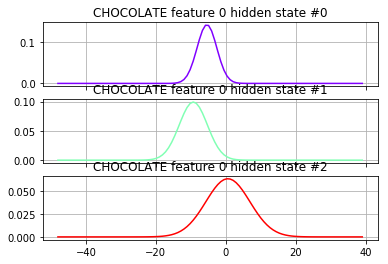

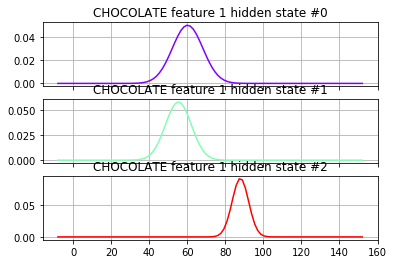

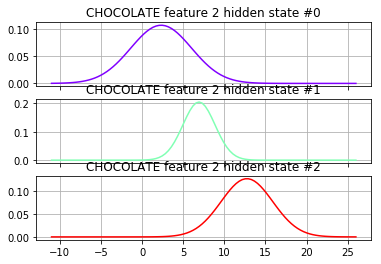

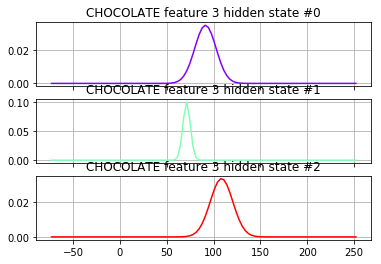

In [23]:
import math
from matplotlib import (cm, pyplot as plt, mlab)

def visualize(word, model):
    """ visualize the input model for a particular word """
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])
    figures = []
    for parm_idx in range(len(model.means_[0])):
        xmin = int(min(model.means_[:,parm_idx]) - max(variance[:,parm_idx]))
        xmax = int(max(model.means_[:,parm_idx]) + max(variance[:,parm_idx]))
        fig, axs = plt.subplots(model.n_components, sharex=True, sharey=False)
        colours = cm.rainbow(np.linspace(0, 1, model.n_components))
        for i, (ax, colour) in enumerate(zip(axs, colours)):
            x = np.linspace(xmin, xmax, 100)
            mu = model.means_[i,parm_idx]
            sigma = math.sqrt(np.diag(model.covars_[i])[parm_idx])
            ax.plot(x, mlab.normpdf(x, mu, sigma), c=colour)
            ax.set_title("{} feature {} hidden state #{}".format(word, parm_idx, i))

            ax.grid(True)
        figures.append(plt)
    for p in figures:
        p.show()
        
visualize(my_testword, model)

#####  ModelSelector class
Review the `SelectorModel` class from the codebase found in the `my_model_selectors.py` module.  It is designed to be a strategy pattern for choosing different model selectors.  For the project submission in this section, subclass `SelectorModel` to implement the following model selectors.  In other words, you will write your own classes/functions in the `my_model_selectors.py` module and run them from this notebook:

- `SelectorCV `:  Log likelihood with CV
- `SelectorBIC`: BIC 
- `SelectorDIC`: DIC

You will train each word in the training set with a range of values for the number of hidden states, and then score these alternatives with the model selector, choosing the "best" according to each strategy. The simple case of training with a constant value for `n_components` can be called using the provided `SelectorConstant` subclass as follow:

In [24]:
from my_model_selectors import SelectorConstant

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
word = 'VEGETABLE' # Experiment here with different words
model = SelectorConstant(training.get_all_sequences(), training.get_all_Xlengths(), word, n_constant=3).select()
print("Number of states trained in model for {} is {}".format(word, model.n_components))

Number of states trained in model for VEGETABLE is 3


##### Cross-validation folds
If we simply score the model with the Log Likelihood calculated from the feature sequences it has been trained on, we should expect that more complex models will have higher likelihoods. However, that doesn't tell us which would have a better likelihood score on unseen data.  The model will likely be overfit as complexity is added.  To estimate which topology model is better using only the training data, we can compare scores using cross-validation.  One technique for cross-validation is to break the training set into "folds" and rotate which fold is left out of training.  The "left out" fold scored.  This gives us a proxy method of finding the best model to use on "unseen data". In the following example, a set of word sequences is broken into three folds using the [scikit-learn Kfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class object. When you implement `SelectorCV`, you will use this technique.

In [25]:
from sklearn.model_selection import KFold

training = asl.build_training(features_ground) # Experiment here with different feature sets
word = 'VEGETABLE' # Experiment here with different words
word_sequences = training.get_word_sequences(word)
split_method = KFold()
for cv_train_idx, cv_test_idx in split_method.split(word_sequences):
    print("Train fold indices:{} Test fold indices:{}".format(cv_train_idx, cv_test_idx))  # view indices of the folds

Train fold indices:[2 3 4 5] Test fold indices:[0 1]
Train fold indices:[0 1 4 5] Test fold indices:[2 3]
Train fold indices:[0 1 2 3] Test fold indices:[4 5]


**Tip:** In order to run `hmmlearn` training using the X,lengths tuples on the new folds, subsets must be combined based on the indices given for the folds.  A helper utility has been provided in the `asl_utils` module named `combine_sequences` for this purpose.

##### Scoring models with other criterion
Scoring model topologies with **BIC** balances fit and complexity within the training set for each word.  In the BIC equation, a penalty term penalizes complexity to avoid overfitting, so that it is not necessary to also use cross-validation in the selection process.  There are a number of references on the internet for this criterion.  These [slides](http://www2.imm.dtu.dk/courses/02433/doc/ch6_slides.pdf) include a formula you may find helpful for your implementation.

The advantages of scoring model topologies with **DIC** over BIC are presented by Alain Biem in this [reference](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.6208&rep=rep1&type=pdf) (also found [here](https://pdfs.semanticscholar.org/ed3d/7c4a5f607201f3848d4c02dd9ba17c791fc2.pdf)).  DIC scores the discriminant ability of a training set for one word against competing words.  Instead of a penalty term for complexity, it provides a penalty if model liklihoods for non-matching words are too similar to model likelihoods for the correct word in the word set.

<a id='part2_submission'></a>
### Model Selection Implementation Submission
Implement `SelectorCV`, `SelectorBIC`, and `SelectorDIC` classes in the `my_model_selectors.py` module.  Run the selectors on the following five words. Then answer the questions about your results.

**Tip:** The `hmmlearn` library may not be able to train or score all models.  Implement try/except contructs as necessary to eliminate non-viable models from consideration.

In [26]:
words_to_train = ['FISH', 'BOOK', 'VEGETABLE', 'FUTURE', 'JOHN']
import timeit

In [27]:
# TODO: Implement SelectorCV in my_model_selector.py
from my_model_selectors import SelectorCV

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorCV(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

NotImplementedError: 

In [ ]:
# TODO: Implement SelectorBIC in module my_model_selectors.py
from my_model_selectors import SelectorBIC

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorBIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

In [ ]:
# TODO: Implement SelectorDIC in module my_model_selectors.py
from my_model_selectors import SelectorDIC

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorDIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

**Question 2:**  Compare and contrast the possible advantages and disadvantages of the various model selectors implemented.

**Answer 2:**

<a id='part2_test'></a>
### Model Selector Unit Testing
Run the following unit tests as a sanity check on the implemented model selectors.  The test simply looks for valid interfaces  but is not exhaustive. However, the project should not be submitted if these tests don't pass.

In [ ]:
from asl_test_model_selectors import TestSelectors
suite = unittest.TestLoader().loadTestsFromModule(TestSelectors())
unittest.TextTestRunner().run(suite)

<a id='part3_tutorial'></a>
## PART 3: Recognizer
The objective of this section is to "put it all together".  Using the four feature sets created and the three model selectors, you will experiment with the models and present your results.  Instead of training only five specific words as in the previous section, train the entire set with a feature set and model selector strategy.  
### Recognizer Tutorial
##### Train the full training set
The following example trains the entire set with the example `features_ground` and `SelectorConstant` features and model selector.  Use this pattern for you experimentation and final submission cells.



In [ ]:
# autoreload for automatically reloading changes made in my_model_selectors and my_recognizer
%load_ext autoreload
%autoreload 2

from my_model_selectors import SelectorConstant

def train_all_words(features, model_selector):
    training = asl.build_training(features)  # Experiment here with different feature sets defined in part 1
    sequences = training.get_all_sequences()
    Xlengths = training.get_all_Xlengths()
    model_dict = {}
    for word in training.words:
        model = model_selector(sequences, Xlengths, word, 
                        n_constant=3).select()
        model_dict[word]=model
    return model_dict

models = train_all_words(features_ground, SelectorConstant)
print("Number of word models returned = {}".format(len(models)))

##### Load the test set
The `build_test` method in `ASLdb` is similar to the `build_training` method already presented, but there are a few differences:
- the object is type `SinglesData` 
- the internal dictionary keys are the index of the test word rather than the word itself
- the getter methods are `get_all_sequences`, `get_all_Xlengths`, `get_item_sequences` and `get_item_Xlengths`

In [ ]:
test_set = asl.build_test(features_ground)
print("Number of test set items: {}".format(test_set.num_items))
print("Number of test set sentences: {}".format(len(test_set.sentences_index)))

<a id='part3_submission'></a>
### Recognizer Implementation Submission
For the final project submission, students must implement a recognizer following guidance in the `my_recognizer.py` module.  Experiment with the four feature sets and the three model selection methods (that's 12 possible combinations). You can add and remove cells for experimentation or run the recognizers locally in some other way during your experiments, but retain the results for your discussion.  For submission, you will provide code cells of **only three** interesting combinations for your discussion (see questions below). At least one of these should produce a word error rate of less than 60%, i.e. WER < 0.60 . 

**Tip:** The hmmlearn library may not be able to train or score all models.  Implement try/except contructs as necessary to eliminate non-viable models from consideration.

In [ ]:
# TODO implement the recognize method in my_recognizer
from my_recognizer import recognize
from asl_utils import show_errors

In [ ]:
# TODO Choose a feature set and model selector
features = features_ground # change as needed
model_selector = SelectorConstant # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)

In [ ]:
# TODO Choose a feature set and model selector
# TODO Recognize the test set and display the result with the show_errors method

In [ ]:
# TODO Choose a feature set and model selector
# TODO Recognize the test set and display the result with the show_errors method

**Question 3:**  Summarize the error results from three combinations of features and model selectors.  What was the "best" combination and why?  What additional information might we use to improve our WER?  For more insight on improving WER, take a look at the introduction to Part 4.

**Answer 3:**

<a id='part3_test'></a>
### Recognizer Unit Tests
Run the following unit tests as a sanity check on the defined recognizer.  The test simply looks for some valid values but is not exhaustive. However, the project should not be submitted if these tests don't pass.

In [ ]:
from asl_test_recognizer import TestRecognize
suite = unittest.TestLoader().loadTestsFromModule(TestRecognize())
unittest.TextTestRunner().run(suite)

<a id='part4_info'></a>
## PART 4: (OPTIONAL)  Improve the WER with Language Models
We've squeezed just about as much as we can out of the model and still only get about 50% of the words right! Surely we can do better than that.  Probability to the rescue again in the form of [statistical language models (SLM)](https://en.wikipedia.org/wiki/Language_model).  The basic idea is that each word has some probability of occurrence within the set, and some probability that it is adjacent to specific other words. We can use that additional information to make better choices.

##### Additional reading and resources
- [Introduction to N-grams (Stanford Jurafsky slides)](https://web.stanford.edu/class/cs124/lec/languagemodeling.pdf)
- [Speech Recognition Techniques for a Sign Language Recognition System, Philippe Dreuw et al](https://www-i6.informatik.rwth-aachen.de/publications/download/154/Dreuw--2007.pdf) see the improved results of applying LM on *this* data!
- [SLM data for *this* ASL dataset](ftp://wasserstoff.informatik.rwth-aachen.de/pub/rwth-boston-104/lm/)

##### Optional challenge
The recognizer you implemented in Part 3 is equivalent to a "0-gram" SLM.  Improve the WER with the SLM data provided with the data set in the link above using "1-gram", "2-gram", and/or "3-gram" statistics. The `probabilities` data you've already calculated will be useful and can be turned into a pandas DataFrame if desired (see next cell).  
Good luck!  Share your results with the class!

In [ ]:
# create a DataFrame of log likelihoods for the test word items
df_probs = pd.DataFrame(data=probabilities)
df_probs.head()